### About:
4/10/2021 Program calculate the correlation coefficient:

    (1) between numbers of internet providers
    (2) between states
    (3) Population
    (4) between states & internet speeds??? -> Self Assigned

#### NOTE: Make sure to unzip the xlsx files

@author: Minh Nguyen @AIA

@credit: Qasim, Andrei @AIA

In [1]:
import numpy as np
from numpy.random import randn
from numpy.random import seed
from numpy import array_split
import pandas as pd
from sklearn import metrics as mt
from sklearn import model_selection as md
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.datasets as ds
import random

### Correlation Calculation

In [2]:
def correlation_cal(df):
    # Instead of just dropping the missing values, we will fill in N/A values
    if df.isna().values.any():
        while True:
            missing_type = input("Please enter the type of missing value replacement: mean, medium, mode, or drop from the row")
            missing_type = missing_type.lower()
            if(missing_type in ['mean', 'median', 'mode', 'drop']):
                if(missing_type == 'mean'):
                    df.fillna(df.mean(), inplace=True)
                elif(missing_type == 'median'):
                    df.fillna(df.median(), inplace=True)
                elif(missing_type == 'mode'):
                    df.fillna(df.mode(), inplace=True)
                else:
                    df.dropna()
                break
            else:
                print("Please input the option from the list")
    
    # Calculate input data correlation
    while True:
        corr_type = input("Please enter type of correlation: Pearson, Spearman, or Kendall: ")
        corr_type = corr_type.lower()
        if corr_type in ['pearson', 'spearman', 'kendall']:
            break
        else:
            print("Please try again")
    
    # Plot correlation matrix
    corrMatrix = df.corr(method=corr_type)
    _, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(corrMatrix, ax = ax, cmap="gray", linewidths = 0.1) # cmap can also be "YlGnBu"

# (1) Correlation Calculation Between Number of Internet Providers

#### Preprocess Data

In [3]:
!ls

Corr4cU.ipynb
preprocessed_data_wl_urban.xlsx


In [4]:
def parse_data_bis(file):
    """ Function load csv files into csv pandas by numbers of internet providers
        Function parse data by internet speed for all 50 states + nation (row 0)
    """
    dataset = pd.read_excel(file, skiprows=[0], usecols=[4,5,6,7,8,9,10,11])
    return dataset

In [5]:
df_bis = parse_data_bis("preprocessed_data_wl_urban.xlsx")

In [6]:
df_bis.head()

,≥ 1,≥ 2,≥ 3,≥ 4,≥ 5,≥ 6,≥ 7,≥ 8
0,1.000,1.000,0.993,0.964,0.661,0.384,0.205,0.105
1,1.000,1.000,0.972,0.901,0.206,0.018,0.000,0.000
2,0.982,0.971,0.891,0.643,0.141,0.000,0.000,0.000
3,0.998,0.995,0.987,0.977,0.929,0.837,0.487,0.241
4,1.000,1.000,0.948,0.716,0.506,0.057,0.012,0.001


### Run 1: Correlation Pearson - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Pearson


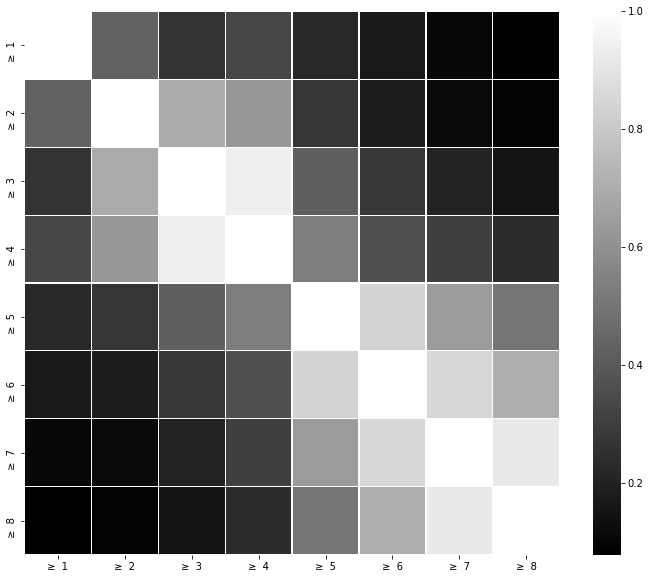

In [7]:
# Run Correlation Pearson
correlation_cal(df_bis)

### Run 2: Correlation Spearman - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Spearman


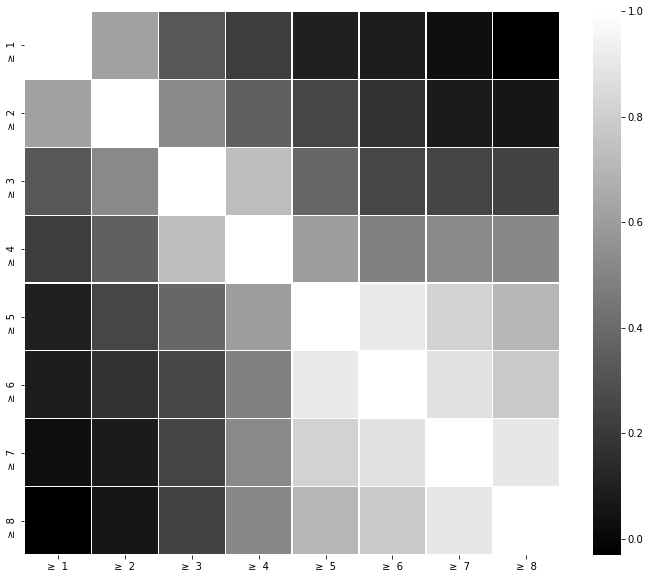

In [8]:
# Run Correlation Spearman
correlation_cal(df_bis)

### Run 3: Correlation Kendall - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Kendall


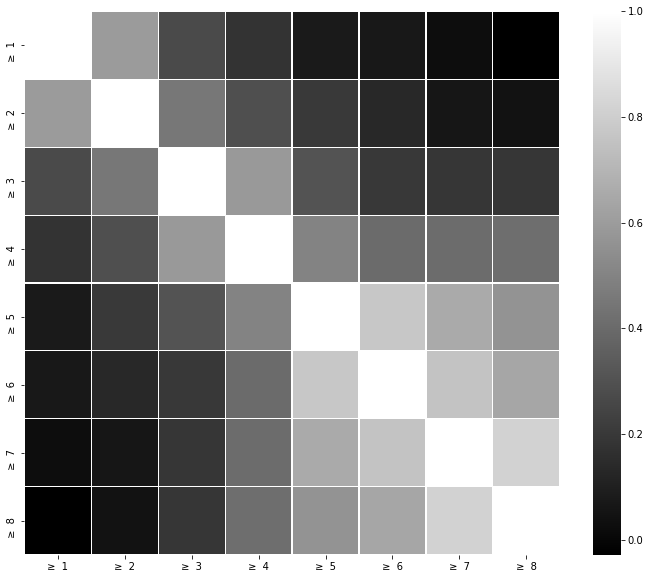

In [9]:
# Run Correlation Kendall
correlation_cal(df_bis)

### Analysis - Self Assigned

1/ What are the two significant correlation coefficient for Pearson, Spearman, Kendall?

2/ What are other analysis we can do with these graphs?

3/ Any other metric besides Pearson, Spearman, Kendall?

# (2) Correlation Calculation Between States

In [10]:
def parse_data_bs(file):
    """ Function load csv files into csv pandas by internet speed 
        Function parse data by states and nation for all different numbers of internet providers
    """
    dataset = pd.read_excel(file, skiprows=[0,1], usecols=[0,4,5,6,7,8,9,10,11], drop=True)
    dataset.set_index("Nationwide", inplace=True)
    dataset = dataset.T
    
    return dataset

In [11]:
df_bs = parse_data_bs("preprocessed_data_wl_urban.xlsx")

In [12]:
df_bs.head()

Nationwide,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Virginia,Washington,West Virginia,Wisconsin,Wyoming,American Samoa,Guam,Commonwealth of the Northern Mariana Islands,Puerto Rico,United States Virgin Islands
1,1.000,0.982,0.998,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.00,0.991,0.998,1.000
1.1,1.000,0.971,0.995,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,0.992,1.000,1.000,0.738,0.99,0.000,0.997,1.000
0.993,0.972,0.891,0.987,0.948,0.994,1.000,0.998,1.000,1.000,1.000,...,0.996,0.997,0.950,0.994,0.984,0.000,0.00,0.000,0.988,0.997
0.964,0.901,0.643,0.977,0.716,0.980,0.999,0.952,0.832,1.000,0.997,...,0.981,0.993,0.925,0.968,0.838,0.000,0.00,0.000,0.953,0.983
0.661,0.206,0.141,0.929,0.506,0.877,0.976,0.000,0.000,0.128,0.287,...,0.557,0.868,0.502,0.897,0.692,0.000,0.00,0.000,0.799,0.951


### Run 1: Correlation Pearson - Mean


Please enter type of correlation: Pearson, Spearman, or Kendall: Pearson


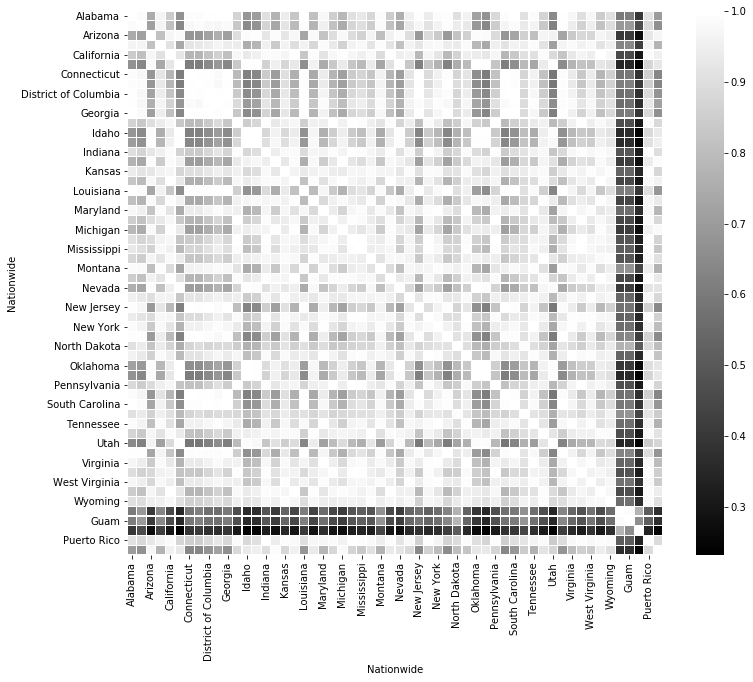

In [13]:
# Run Correlation Pearson
correlation_cal(df_bs)

### Run 2: Correlation Spearman - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Spearman


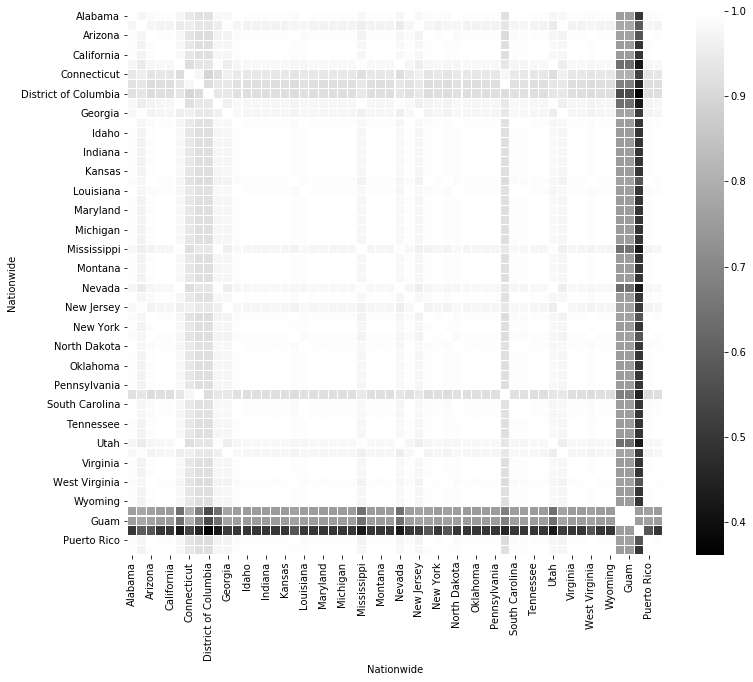

In [14]:
# Run Correlation Spearman
correlation_cal(df_bs)

### Run 3: Correlation Kendall - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Kendall


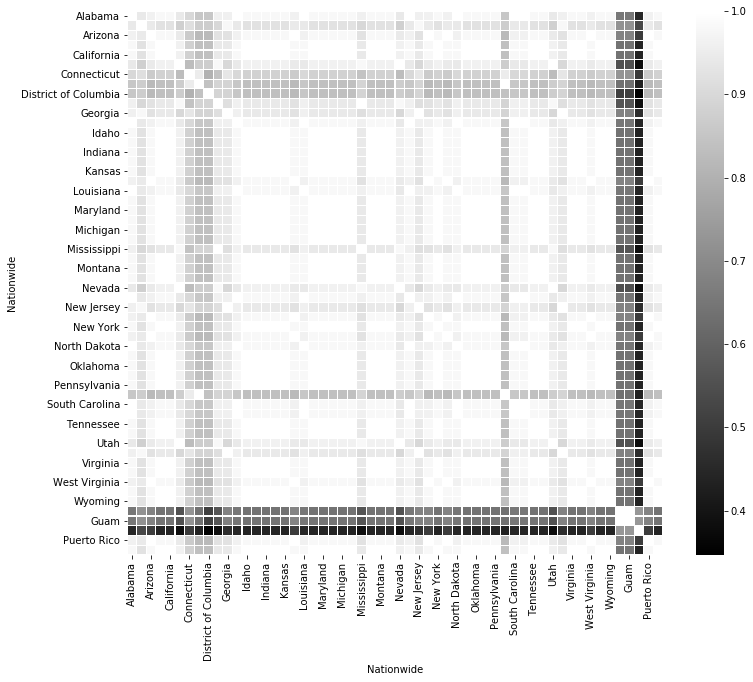

In [15]:
# Run Correlation Kendall
correlation_cal(df_bs)

# (3) Correlation Calculation Between Numbers of Population

In [16]:
def parse_data_bpop(file):
    """ Function load csv files into csv pandas by internet speed 
        Function parse data by number of poppulation for all different numbers of internet providers
    """
    dataset = pd.read_excel(file, skiprows=[0], usecols=[3,4,5,6,7,8,9,10,11], drop=True)
    dataset.set_index("Population", inplace=True)
    dataset = dataset.T
    
    return dataset

In [17]:
df_bpop = parse_data_bpop("preprocessed_data_wl_urban.xlsx")

In [18]:
df_bpop.head()

Population,263876981,2942392,498275,6213717,1742936,"36, 856, 869",4649542,3202837,783658,624148,...,6406272,5985973,915526,4141786,389405,41307,108368,33906,2667775,42552
≥ 1,1.000,1.000,0.982,0.998,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.00,0.991,0.998,1.000
≥ 2,1.000,1.000,0.971,0.995,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,0.992,1.000,1.000,0.738,0.99,0.000,0.997,1.000
≥ 3,0.993,0.972,0.891,0.987,0.948,0.994,1.000,0.998,1.000,1.000,...,0.996,0.997,0.950,0.994,0.984,0.000,0.00,0.000,0.988,0.997
≥ 4,0.964,0.901,0.643,0.977,0.716,0.980,0.999,0.952,0.832,1.000,...,0.981,0.993,0.925,0.968,0.838,0.000,0.00,0.000,0.953,0.983
≥ 5,0.661,0.206,0.141,0.929,0.506,0.877,0.976,0.000,0.000,0.128,...,0.557,0.868,0.502,0.897,0.692,0.000,0.00,0.000,0.799,0.951


### Run 1: Correlation Pearson - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Pearson


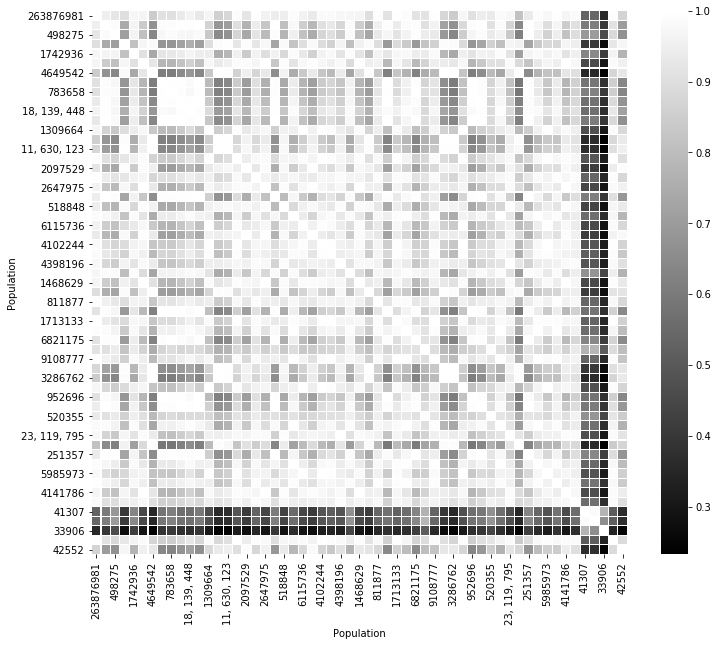

In [19]:
# Run Correlation Pearson => Automatically drop the first col since it is string
correlation_cal(df_bpop)

### Run 2: Correlation Spearman - Mean


Please enter type of correlation: Pearson, Spearman, or Kendall: Spearman


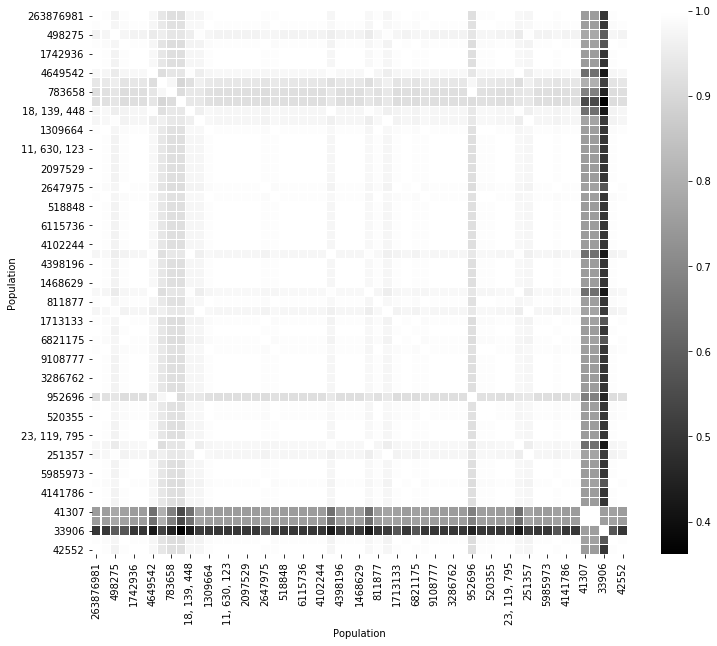

In [20]:
# Run Correlation Spearman => Automatically drop the first col since it is string
correlation_cal(df_bpop)

### Run 3: Correlation Kendall - Mean¶


Please enter type of correlation: Pearson, Spearman, or Kendall: Kendall


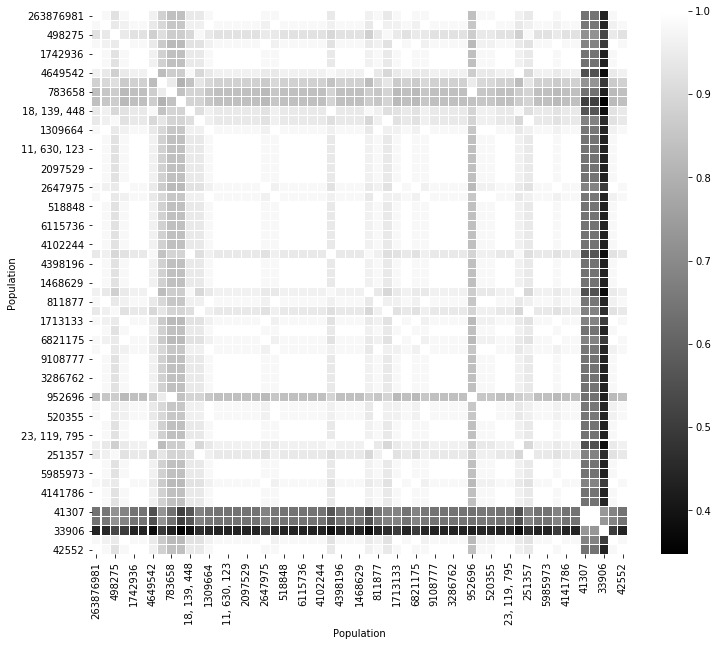

In [21]:
# Run Correlation Kendall => Automatically drop the first col since it is string
correlation_cal(df_bpop)

### Analysis - Self Assigned

1/ What are the two significant correlation coefficient for Pearson, Spearman, Kendall?

2/ What are other analysis we can do with these graphs?

3/ Any other metric besides Pearson, Spearman, Kendall?